In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
products = pd.read_csv(f"/home/adam/Documents/JobApplications/MarketDial/marketdial_ds_takehome/products_of_interest.csv", header=None)
stores = pd.read_csv(f"/home/adam/Documents/JobApplications/MarketDial/marketdial_ds_takehome/store_attributes.csv", usecols=list(range(1, 7)))
transactions = pd.read_csv(f"/home/adam/Documents/JobApplications/MarketDial/marketdial_ds_takehome/transactions.csv", usecols=list(range(1, 6)))

### Stores

In [3]:
stores.head()

,store_id,attribute_id,attribute_type,attribute_int_val,attribute_str_val,attribute_float_val
0,631,8,float,NaN,NaN,9447217.69
1,501,8,float,NaN,NaN,8807968.29
2,486,8,float,NaN,NaN,4038617.13
3,392,8,float,NaN,NaN,12222048.62
4,561,8,float,NaN,NaN,4298550.49


In [4]:
stores['store_id'].nunique()

337

In [5]:
stores['attribute_id'].nunique()

53

In [6]:
stores.groupby('attribute_type')['attribute_id'].nunique()

attribute_type
float      47
integer     2
string      4
Name: attribute_id, dtype: int64

In [7]:
string_cols = stores[stores['attribute_type'] == 'string']['attribute_id'].unique()

print("Strings: ", string_cols)

Strings:  [36 15  9 51]


In [8]:
# Check if the data is safe to pivot
    # i.e. no mislabeled attributes, missing values, etc

print(stores[stores['attribute_type'] == 'float'].count())
print()
print(stores[stores['attribute_type'] == 'integer'].count())
print()
print(stores[stores['attribute_type'] == 'string'].count())

store_id               14516
attribute_id           14516
attribute_type         14516
attribute_int_val          0
attribute_str_val          0
attribute_float_val    14516
dtype: int64

store_id               674
attribute_id           674
attribute_type         674
attribute_int_val      674
attribute_str_val        0
attribute_float_val      0
dtype: int64

store_id               1348
attribute_id           1348
attribute_type         1348
attribute_int_val         0
attribute_str_val      1348
attribute_float_val       0
dtype: int64


In [9]:
stores['value'] = \
    stores['attribute_int_val'] \
    .combine_first(stores['attribute_str_val']) \
    .combine_first(stores['attribute_float_val'])

In [10]:
# Check it worked as expected

# stores[stores['attribute_type'] == 'integer']
# 674+1348+14516

stores.count()

store_id               16538
attribute_id           16538
attribute_type         16538
attribute_int_val        674
attribute_str_val       1348
attribute_float_val    14516
value                  16538
dtype: int64

In [11]:
# Put stores into a more analysis-friendly format

stores = pd.pivot(stores, index='store_id', columns='attribute_id', values='value')

In [12]:
stores.head()

attribute_id,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
store_id,,,,,,,,,,,,,,,,,,,,,
338,4860.41,0.2087,0.9293,0.1495,NaN,6.0,0.1455,4787174.31,CO,4.3019,...,1.7362,78.8092,9.4235,0.0272,53186.0,0.3234,6.463,CO-AURORA-579,5499.0,NaN
339,2546.26,0.4454,0.4954,0.2152,0.0147,5.0,0.247,3868819.68,UT,2.0088,...,3.0488,63.6985,1.0423,0.046,22451.0,2.236,3.3932,UT-CEDAR CITY-244,12718.0,NaN
340,2446.6,1.13,1.0012,0.0001,NaN,22.0,0.1606,1624734.44,UT,2.5842,...,8.9465,NaN,3.091,0.1284,75574.0,1.2107,22.976,UT-SaltLake-539,137251.0,NaN
341,2526.21,0.17,0.2454,0.2416,NaN,4.0,0.1906,13185248.22,AZ,1.7727,...,2.2278,77.9783,0.4614,0.021,4118.0,3.3511,3.5039,AZ-SHOW LOW-388,3908.0,NaN
342,2368.64,0.0202,0.4319,0.2248,NaN,5.0,0.1988,7851917.14,OR,2.4074,...,2.4932,71.6176,0.7586,0.0473,9886.0,1.1633,3.7059,OR-BAKER CITY-439,5714.0,NaN


In [13]:
# Check data availability
attribute_pcts = stores.count() / len(stores)
attribute_pcts.sort_values()

# Drop attributes with <90% data populated (4 attributes)
print("Dropping Attributes: ", attribute_pcts[attribute_pcts < 0.9].index)
stores = stores.drop(attribute_pcts[attribute_pcts < 0.9].index, axis = 1)

Dropping Attributes:  Int64Index([5, 12, 39, 53], dtype='int64', name='attribute_id')


In [14]:
stores.head()

attribute_id,1,2,3,4,6,7,8,9,10,11,...,43,44,45,46,47,48,49,50,51,52
store_id,,,,,,,,,,,,,,,,,,,,,
338,4860.41,0.2087,0.9293,0.1495,6.0,0.1455,4787174.31,CO,4.3019,8.4082,...,-104.7386,1.7362,78.8092,9.4235,0.0272,53186.0,0.3234,6.463,CO-AURORA-579,5499.0
339,2546.26,0.4454,0.4954,0.2152,5.0,0.247,3868819.68,UT,2.0088,1.0779,...,-113.0741,3.0488,63.6985,1.0423,0.046,22451.0,2.236,3.3932,UT-CEDAR CITY-244,12718.0
340,2446.6,1.13,1.0012,0.0001,22.0,0.1606,1624734.44,UT,2.5842,5.6805,...,-111.887,8.9465,NaN,3.091,0.1284,75574.0,1.2107,22.976,UT-SaltLake-539,137251.0
341,2526.21,0.17,0.2454,0.2416,4.0,0.1906,13185248.22,AZ,1.7727,1.5542,...,-110.0182,2.2278,77.9783,0.4614,0.021,4118.0,3.3511,3.5039,AZ-SHOW LOW-388,3908.0
342,2368.64,0.0202,0.4319,0.2248,5.0,0.1988,7851917.14,OR,2.4074,0.8598,...,-117.8227,2.4932,71.6176,0.7586,0.0473,9886.0,1.1633,3.7059,OR-BAKER CITY-439,5714.0


##### Impute Missing Data + Transformations

In [15]:
# There is no missing data for the string columns...thank you

numeric_cols = [col for col in stores.columns if col not in string_cols]

stores[numeric_cols] = stores[numeric_cols].apply(pd.to_numeric)
stores[numeric_cols] = stores[numeric_cols].fillna(stores[numeric_cols].median())

In [16]:
# Attribute 51 is unique for each store - dropped to allow for dummy variables

stores[string_cols[3]].nunique()

stores.drop(columns = string_cols[3], inplace = True)
string_cols = np.delete(string_cols, 3)

In [17]:
# Dummy code strings/categories
stores_with_dummies = pd.get_dummies(stores)

In [18]:
stores_with_dummies

,1,2,3,4,6,7,8,10,11,13,...,9_WY,15_Big Snow,15_Canyon,15_New & Closed Stores,15_Red Rock,15_White Water,36_ADVENTURE,36_ADVENTURE BTO,36_COUNTRY,36_Unknown
store_id,,,,,,,,,,,,,,,,,,,,,
338,4860.41,0.2087,0.9293,0.1495,6.0,0.1455,4787174.31,4.3019,8.4082,4.76,...,0,0,0,0,1,0,1,0,0,0
339,2546.26,0.4454,0.4954,0.2152,5.0,0.2470,3868819.68,2.0088,1.0779,10.27,...,0,0,0,0,1,0,0,0,1,0
340,2446.60,1.1300,1.0012,0.0001,22.0,0.1606,1624734.44,2.5842,5.6805,10.36,...,0,0,1,0,0,0,0,1,0,0
341,2526.21,0.1700,0.2454,0.2416,4.0,0.1906,13185248.22,1.7727,1.5542,17.83,...,0,0,0,0,1,0,1,0,0,0
342,2368.64,0.0202,0.4319,0.2248,5.0,0.1988,7851917.14,2.4074,0.8598,22.97,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,3941.84,0.0120,0.6811,0.3910,1.0,0.2395,1795826.69,1.8663,1.2920,16.48,...,0,0,0,0,1,0,0,0,0,1
672,3646.54,0.6696,0.3849,0.2570,5.0,0.2452,2871680.23,1.8750,3.2774,12.25,...,0,0,1,0,0,0,0,0,1,0
673,4031.09,0.1394,0.4460,0.1990,1.0,0.2606,13600550.57,1.8127,0.6757,17.01,...,0,0,0,0,0,1,1,0,0,0


##### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(stores_with_dummies)

##### Dimensionality Reduction

In [20]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95) # Retain 95% of variance
# reduced_data = pca.fit_transform(scaled_data) # This yields 34 components

pca = PCA()
pca.fit(scaled_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

Retaining 20 components preserves 0.8534227353461183 variance


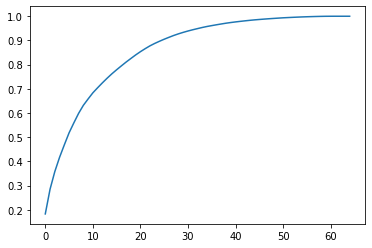

In [21]:
plt.plot(cumsum)

n_components = 20
print(f'Retaining {n_components} components preserves {cumsum[n_components]} variance')

In [22]:
reduced_data = PCA(n_components=n_components).fit_transform(scaled_data)
reduced_data.shape

(337, 20)

##### Initial Clustering

Running -  5
Running -  10
Running -  15
Running -  20
Running -  25
Running -  30
Running -  35
Running -  40
Running -  45
Running -  50
Running -  55
Running -  60
Running -  65
Running -  70
Running -  75
Running -  80
Running -  85
Running -  90
Running -  95


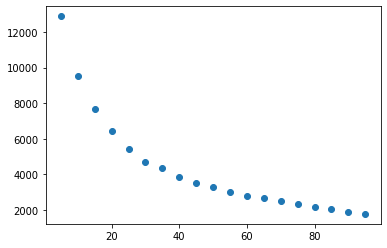

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Prep Work
wcss = []

### Use Elbow method to identify natural clusters
for i in range(5, 100, 5):
    print('Running - ', i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(5, 100, 5), wcss, linestyle="none", marker='o')


In [24]:
from sklearn.manifold import TSNE

# Tested various perplexity values between 5-50.  Lower values give generally better results
    # It is a proxy value for the number of nearest neighbors.  The dataset is small, so small values work better
tsne_data = TSNE(n_components=2, init='random', perplexity=15).fit_transform(reduced_data)

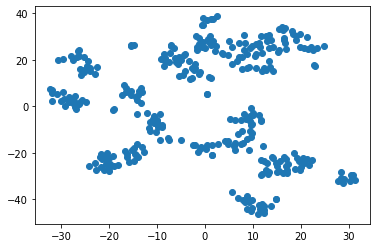

In [25]:
# Rerunning multiple times yields ~9 to 11 clusters
plt.plot(tsne_data[:, 0], tsne_data[:, 1], linestyle="none", marker="o")

##### Tuning DBSCAN

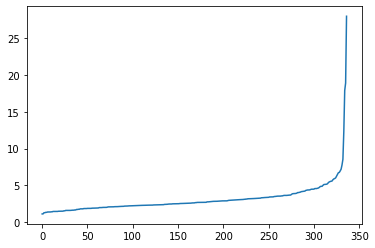

In [26]:
from sklearn.neighbors import NearestNeighbors

neighbors = 5
neigh = NearestNeighbors(n_neighbors = neighbors, n_jobs = -1)
nbrs = neigh.fit(reduced_data)
distances, indicies = nbrs.kneighbors(reduced_data)

distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

# Y axis is a proxy for the eps value (max distance between points in a cluster)

In [27]:
from sklearn.cluster import DBSCAN

# dbsc = DBSCAN(eps=4, min_samples=5) # Good
# dbsc = DBSCAN(eps=3.5, min_samples=5) # Very Good
dbsc = DBSCAN(eps=3.5, min_samples=5)
dbsc.fit(reduced_data)

DBSCAN(eps=3.5)

In [28]:
labels_check = dbsc.labels_
(val, count) = np.unique(labels_check, return_counts=True)
np.asarray((val, count)).T

array([[ -1, 145],
       [  0,   9],
       [  1,  13],
       [  2,  82],
       [  3,   8],
       [  4,   7],
       [  5,  33],
       [  6,   7],
       [  7,   7],
       [  8,  16],
       [  9,   5],
       [ 10,   5]])

##### Sanity Check Labels

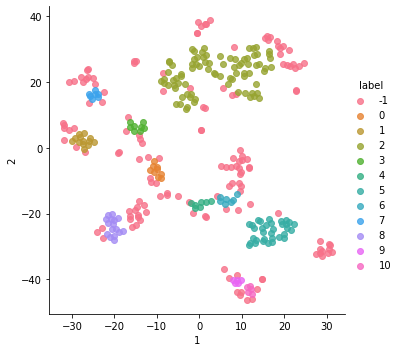

In [29]:
tsne_df = pd.DataFrame(tsne_data, columns = ['1', '2'])
tsne_df['label'] = dbsc.labels_
sns.lmplot(x='1', y='2', data=tsne_df, hue='label', fit_reg=False)

##### Divide Stores

In [30]:
store_labels = pd.DataFrame(index=stores_with_dummies.index, data = dbsc.labels_, columns=["label"])
store_labels

,label
store_id,
338,-1
339,0
340,-1
341,1
342,-1
...,...
671,-1
672,2
673,-1


In [31]:
# You can now select store_ids from each segment to pick the treatment and control groups
store_labels[store_labels['label']==3]

,label
store_id,
348,3
354,3
464,3
496,3
516,3
634,3
648,3
669,3
